In [1]:
import numpy as np
import pandas as pd

In [2]:
from aux_plt import *

In [3]:
df = pd.read_csv("RESULTS2.csv.gz", compression='gzip', header=None)
CN = ["ID", "D", "SEED", "a0", "b0", "c0", "d0", "NITER", "LR", "K", "S", "SY", "E", "V", "LAMBDA",
      "iteration", "elapsed", "ct", "rt", "cb", "rb", "loss", "Et", "Vt", "Ee", "Ve", 
      "best_loss", "best_a", "best_b", "best_c", "best_d", "best_E", "best_V", "failed"]
df.rename(columns=dict(enumerate(CN)), inplace=True)
df = df.dropna(axis=0) # NAs!
df

,ID,D,SEED,a0,b0,c0,d0,NITER,LR,K,...,Ee,Ve,best_loss,best_a,best_b,best_c,best_d,best_E,best_V,failed
0,0,E,0,0.1,1.0,0.1,1.0,20001,0.1,25,...,0.180341,0.364165,9.642569e+01,0.100000,1.000000,0.100000,1.000000,0.250000,0.550000,False
1,0,E,0,0.1,1.0,0.1,1.0,20001,0.1,25,...,0.127337,0.183359,9.642569e+01,0.100000,1.000000,0.100000,1.000000,0.250000,0.550000,False
2,0,E,0,0.1,1.0,0.1,1.0,20001,0.1,25,...,0.404007,1.142474,9.208308e+01,0.119741,0.991695,0.108469,0.898716,0.364324,0.866390,False
3,0,E,0,0.1,1.0,0.1,1.0,20001,0.1,25,...,0.389236,0.765286,9.208308e+01,0.119741,0.991695,0.108469,0.898716,0.364324,0.866390,False
4,0,E,0,0.1,1.0,0.1,1.0,20001,0.1,25,...,0.348633,0.575022,9.208308e+01,0.119741,0.991695,0.108469,0.898716,0.364324,0.866390,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374485,9,E,4,0.1,1.0,0.1,1.0,20001,0.1,25,...,1.073062,0.830297,2.032818e-11,15650.551505,33607.950127,12334.298017,110669.388451,1.297521,1.297531,False
374486,9,E,4,0.1,1.0,0.1,1.0,20001,0.1,25,...,0.931477,0.683270,2.032818e-11,15650.551505,33607.950127,12334.298017,110669.388451,1.297521,1.297531,False
374487,9,E,4,0.1,1.0,0.1,1.0,20001,0.1,25,...,0.881658,0.670790,2.032818e-11,15650.551505,33607.950127,12334.298017,110669.388451,1.297521,1.297531,False
374488,9,E,4,0.1,1.0,0.1,1.0,20001,0.1,25,...,0.958042,0.736552,2.032818e-11,15650.551505,33607.950127,12334.298017,110669.388451,1.297521,1.297531,False


In [4]:
df_raw = df

# Auxiliary preprocessing & plotting code

In [5]:
f = lambda x: r"$10^3$" if x==1000 else "$%s$" % x 

In [6]:
def dfs(df, a0, b0, c0, d0, E=-1, V=-1, LAMBDA=0.0):  
    d1 = df[(df.LAMBDA==0.0) & (df.V==V) & (df.E==E)]
    d1 = d1.drop(columns=["failed"])

    d11 = d1[(d1.a0==a0)&(d1.b0==b0)&(d1.c0==c0)&(d1.d0==d0)]
    #print("a0=%s b0=%s c0=%s d0=%s => %s" % (a0,b0,c0,d0, len(d11)))

    means = d11.groupby(["iteration"]).mean().reset_index()
    stds = d11.groupby(["iteration"]).std().reset_index()
    assert (means.iteration == stds.iteration).all()
    return means, stds

In [7]:
from matplotlib.collections import LineCollection


def coloredline(x, y, colors=None, cmin=None, cmax=None, lw=2.5, cmap="Reds", alpha=1.0, log=True):
    assert (x>0).all()
    assert (y>0).all()
    
    colors = np.array(range(len(means))) if colors is None else np.array(colors)
    if log and colors.min()==0: colors = colors + 1

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a continuous norm to map from data points to colors    
    cmin=colors.min() if cmin is None else cmin
    cmax=colors.max() if cmax is None else cmax    
    norm = mpl.colors.LogNorm(cmin,cmax) if log else plt.Normalize(cmin, cmax)     
    
    
    lc = LineCollection(segments, cmap=cmap, norm=norm, alpha=alpha)
    # Set the values used for colormapping
    lc.set_array(colors)
    lc.set_linewidth(lw)
    line = plt.gca().add_collection(lc)
    return line

In [8]:
def musigma2abcd(mut, sigmat, mub, sigmab):    
    a,b = (mut*mut)/(sigmat*sigmat), mut/(sigmat*sigmat)
    c,d = (mub*mub)/(sigmab*sigmab), mub/(sigmab*sigmab)
    return a, b, c, d

def abcd2musigma(a, b, c, d, env=np):    
    return a/b, env.sqrt(a)/b, c/d, env.sqrt(c)/d

In [9]:
K = 25

def theoretical_moments(ct, rt, cb, rb):
    mt, st = ct/rt, np.sqrt(ct) / rt
    mb, sb = cb/rb, np.sqrt(cb) / rb
    e, var = K * mt*mb, K * (mt*mb + (mb*st)**2 + (mt*sb)**2 + (st*sb)**2)  # theoretical         
    return e, var

# Configuration

In [10]:
CFGS = [ (10, 1, 10, 1), (10,2,10,2),
        (0.001, 0.01, 0.01, 0.1),(0.1, 1, 0.1, 1), 
        (0.1, 0.1, 0.1, 0.1), (1, 1, 0.1, 0.1), (1000, 1000, 1000, 1000),
         ]

LABELS = ["A", "B", "C", "D", "E", "F", "G", "H"]
SCALES = [ 'Purples_r','YlOrBr_r', 
          'Reds_r', 'Blues_r', 'Greens_r', 'Oranges_r',  'Greys_r', 
          
          'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
           'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
COLORS2 = ["purple",  "brown",
          "red", "dodgerblue", "green", "orange", "gray", 
           ]
COLORS1 = ["violet",  "maroon",
          "salmon", "dodgerblue", "yellowgreen",  "orange", "gray", 
          ]

# 2D PLOTS

In [11]:
COLORS = COLORS2
#df = df_raw
df = df_raw[df_raw.SEED==0] # One run per configuration!

In [12]:
def smooth(v, step=7):    
    v = np.array(v)
    v = np.array([v[0]]+[np.mean(v[i:(i+step)]) for i in range(1, len(v), step)])
    return v  

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


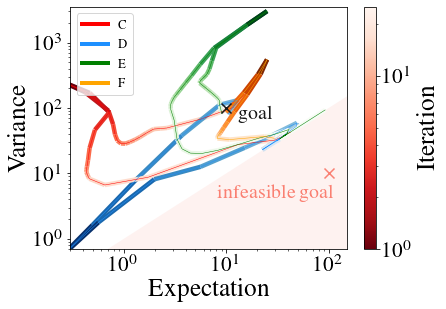

In [13]:
cmin, cmax = 1, 25
COLORDIM, COLORLABEL = "iteration", "Iteration"
#csmooth = smooth
csmooth = lambda x: x
width, lw = 4.5, 0.5


start_plotting(cmbright=False)

#########################################################################################
E, V = 10, 100


# i = 0  #A
# a0,b0,c0,d0 = CFGS[i]        
# means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
# means = means[means.iteration<=15000]    
# l0 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
#                  cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
# plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    

# i = 1 #B
# a0,b0,c0,d0 = CFGS[i]        
# means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
# means = means[means.iteration<=15000]    
# l1 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
#                  cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
# plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 2 #C
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=400]    
l2 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 3 #D
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=40]    
l3 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 4 #E
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=500]    
l4 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 5 #F
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=25]    
l5 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


# i = 6 #G
# a0,b0,c0,d0 = CFGS[i]        
# means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
# means = means[means.iteration<=200]    
# l6 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
#                  cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
# plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])  

#plt.axvline(E, color="gray", lw=2.5, ls="--", zorder=10)
#plt.axhline(E, color="gray", lw=1, ls="dotted", zorder=-1)
#plt.axhline(V, color="gray", lw=2.5, ls="--", zorder=-1)
#plt.scatter([E],[V], marker="o", color="k", s=160, zorder=10)
plt.scatter([E],[V], marker="x", color="k", s=100, zorder=10)
plt.text(E+3,V-40,"goal", ha="left", va="bottom", color="k",  alpha=1.0, fontsize=20)


#########################################################################################
E, V = 100, 10
width, lw = 4.5, 0.5
LS = "-"

# i = 0  #A
# a0,b0,c0,d0 = CFGS[i]        
# means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
# means = means[means.iteration<=15000]    
# l0 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
#                  cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
# plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i], ls=LS)    

# i = 1 #B
# a0,b0,c0,d0 = CFGS[i]        
# means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
# means = means[means.iteration<=15000]    
# l1 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
#                  cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
# plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i], ls=LS)    


i = 2 #C
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=1500]    
l2 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i], ls=LS)    


i = 3 #D
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=500]    
l3 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i], ls=LS)    


i = 4 #E
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=6000]    
l4 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i], ls=LS)    


i = 5 #F
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=1000]    
l5 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i], ls=LS)    


# i = 6 #G
# a0,b0,c0,d0 = CFGS[i]        
# means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
# means = means[means.iteration<=200]    
# l6 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
#                  cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
# plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i], ls=LS)    
  
    
#plt.scatter([E],[V], marker="o", color="k", s=160, zorder=10)
plt.scatter([E],[V], marker="x", color="salmon", s=100, zorder=10)
#plt.axvline(E, color="gray", lw=2.5, ls="--", zorder=10)
#plt.axhline(E, color="gray", lw=1, ls="dotted", zorder=-1)
#plt.axhline(V, color="gray", lw=2.5, ls="--", zorder=-1)
plt.text(E-70,V-3,"infeasible goal", ha="center", va="top", color="salmon",  fontsize=20)

plt.fill_between([0.0001,10000],[0.0001,10000], color="salmon", lw=0, alpha=0.1)

plt.gcf().colorbar(l2, ax=plt.gca(), label=COLORLABEL)
from matplotlib.lines import Line2D
selected = list(range(2, len(CFGS)-1))
custom_lines = [Line2D([0], [0], color=COLORS[i], lw=4) for i in selected]
plt.gca().legend(custom_lines, [LABELS[i] for i in selected], fontsize=13, loc=2)
        
#plt.xlim(0, 1000)
plt.xlim(0.3, 150)
plt.xscale("log")
plt.ylim(0.7, 3500)
plt.yscale("log")

plt.xlabel("Expectation")
plt.ylabel("Variance")

plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.2)    
plt.savefig("convergence_E%sV%s.pdf" % (E,V))
plt.show()

/home/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


0) 10 1 10 1 converged at 271
1) 10 2 10 2 converged at 237
2) 0.001 0.01 0.01 0.1 converged at 409
3) 0.1 1 0.1 1 converged at 109
4) 0.1 0.1 0.1 0.1 converged at 257
5) 1 1 0.1 0.1 converged at 142
6) 1000 1000 1000 1000 converged at 293


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


<Figure size 640x480 with 0 Axes>

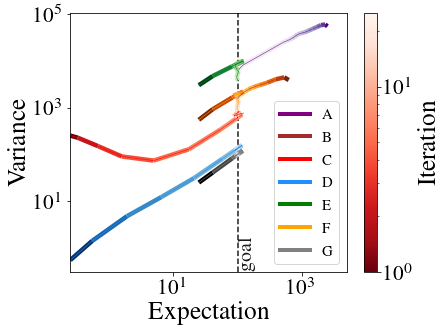

In [14]:
#cmin, cmax = 1, 100
E, V = 100, -1
COLORDIM, COLORLABEL = "iteration", "Iteration"
plt.figure()
eps_E, eps_V = 0.01, 1
width, lw = 4.5, 0.5

for i, (a0,b0,c0,d0) in enumerate(CFGS):
    try:
        means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)   
        converged_iteration = min( np.nonzero( ((abs(means["Ee"]-E)<eps_E)|(E<0)) & ((abs(means["Ve"]-V)<eps_V)|(V<0)) )[0] )
        print("%i)"%i, a0,b0,c0,d0,"converged at", converged_iteration)
    except:
        print("%i)"%i, a0,b0,c0,d0,"converged at ?")
    


start_plotting(cmbright=False)

i = 0 
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=800]    
l0 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    

i = 1 
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=200]    
l1 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 2 
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=200]    
l2 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 3 
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=200]    
l3 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 4 
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=75]    
l4 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 5 
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=200]    
l5 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    


i = 6 
a0,b0,c0,d0 = CFGS[i]        
means, stds = dfs(df, a0,b0,c0,d0, E=E, V=V)    
means = means[means.iteration<=200]    
l6 = coloredline(smooth(means["Et"]), smooth(means["Vt"]), csmooth(means[COLORDIM]), 
                 cmap=SCALES[i%len(SCALES)], lw=width, cmin=cmin, cmax=cmax)
plt.plot(smooth(means["Et"]), smooth(means["Vt"]), lw=lw, color=COLORS[i])    
  
plt.gcf().colorbar(l2, ax=plt.gca(), label=COLORLABEL)
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=COLORS[i], lw=4) for i in range(len(CFGS))]
plt.gca().legend(custom_lines, LABELS, fontsize=15, loc=4)
        
plt.xlim(0.25, 5000)
plt.xscale("log")
plt.yscale("log")


plt.axvline(E, color="k", lw=1.5, ls="--", zorder=-1)
#plt.axhline(E, color="gray", lw=1, ls="dotted", zorder=-1)
plt.axhline(V, color="k", lw=1.5, ls="--", zorder=-1)

y1,y2 = plt.ylim()
x1,x2 = plt.ylim()
plt.text(max(E,x1),y1, "goal", fontsize=20, va="bottom", ha="left", color="k", rotation=90)

plt.xlabel("Expectation")
plt.ylabel("Variance")
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)    
plt.savefig("convergence_E%sV%s.pdf" % (E,V))
plt.show()